In [198]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [39]:
file = "dataset_preprocessedv3.csv"
df = pandas.read_csv(file)

In [164]:
x = df.iloc[:, 3:20]
y = df[['2kRank']]
x = x.to_numpy()
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
y = np.ravel(y.to_numpy())
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Linear Regression

Training Error 28.998238665548588
Test Error 29.441972555443808


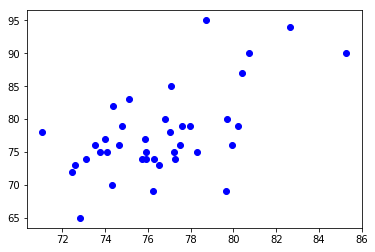

In [209]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')
print("Test Error", mean_squared_error(y_test,y_pred_test))

# Polynomial Regression

In [166]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(X_poly, y_train)
lr2 = LinearRegression()
lr2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Training Error 1.8062082921183456e-27
Test Error 146.62160910875318


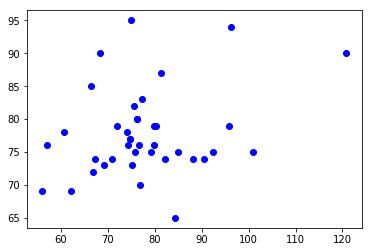

In [208]:
y_pred_test = lr2.predict(poly_reg.fit_transform(x_test))
y_pred_train = lr2.predict(poly_reg.fit_transform(x_train))
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')
print("Test Error", mean_squared_error(y_test,y_pred_test))

# SVR

Training Error 32.02924035621336
Test Error 37.060334268287484


c:\users\akash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


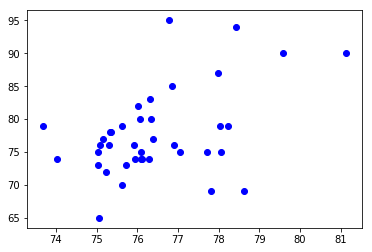

In [207]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')
print("Test Error", mean_squared_error(y_test,y_pred_test))

# Ridge Regression

Training Error 28.99825150789952
Test Error 29.44077371382271


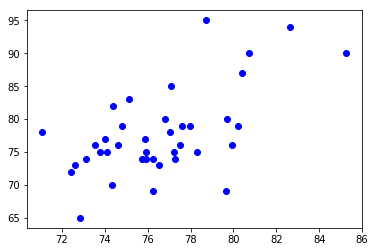

In [197]:
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)
y_pred_test = rr.predict(x_test)
y_pred_train = rr.predict(x_train)
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')
print("Test Error", mean_squared_error(y_test,y_pred_test))

# Lasso Regression

Training Error 34.506925394856005
Test Error 34.95052406154786


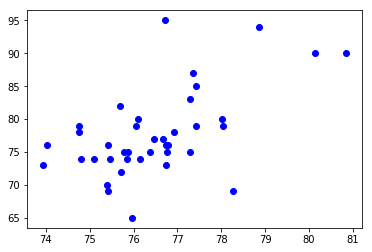

In [206]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_test = lasso.predict(x_test)
y_pred_train = lasso.predict(x_train)
print("Training Error",mean_squared_error(y_train,y_pred_train))
plt.scatter(y_pred_test,y_test, color = 'blue')
print("Test Error", mean_squared_error(y_test,y_pred_test))